In [20]:
import os
import cv2
import glob
import pandas as pd
import pathlib
from PIL import Image
from pathlib import Path
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mimg
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dense,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential,Model

In [21]:
parent="C:/Users/bismark/Desktop/brain_tumor"
train_dir=os.path.join(parent,"Training")
test_dir=os.path.join(parent,"Testing")
train_pituitary_dir=os.path.join(train_dir,"pituitary_tumor")
train_no_dir=os.path.join(train_dir,"no_tumor")
test_pituitary_dir=os.path.join(test_dir,"pituitary_tumor")
test_no_dir=os.path.join(test_dir,"no_dir")

In [42]:
print(os.listdir(test_pituitary_dir))

['image(10).jpg', 'image(11).jpg', 'image(13).jpg', 'image(15).jpg', 'image(18).jpg', 'image(19).jpg', 'image(20).jpg', 'image(21).jpg', 'image(22).jpg', 'image(23).jpg', 'image(27).jpg', 'image(28).jpg', 'image(30).jpg', 'image(31).jpg', 'image(34).jpg', 'image(35).jpg', 'image(36).jpg', 'image(37).jpg', 'image(38).jpg', 'image(41).jpg', 'image(42).jpg', 'image(43).jpg', 'image(44).jpg', 'image(45).jpg', 'image(46).jpg', 'image(47).jpg', 'image(48).jpg', 'image(49).jpg', 'image(5).jpg', 'image(51).jpg', 'image(52).jpg', 'image(53).jpg', 'image(54).jpg', 'image(55).jpg', 'image(56).jpg', 'image(57).jpg', 'image(6).jpg', 'image(60).jpg', 'image(61).jpg', 'image(63).jpg', 'image(64).jpg', 'image(65).jpg', 'image(66).jpg', 'image(67).jpg', 'image(68).jpg', 'image(69).jpg', 'image(7).jpg', 'image(70).jpg', 'image(73).jpg', 'image(76).jpg', 'image(77).jpg', 'image(78).jpg', 'image(79).jpg', 'image(8).jpg', 'image(81).jpg', 'image(82).jpg', 'image(85).jpg', 'image(86).jpg', 'image(87).jpg', 

In [22]:
print(os.listdir(train_pituitary_dir))

['p (393).jpg', 'p (394).jpg', 'p (395).jpg', 'p (396).jpg', 'p (397).jpg', 'p (398).jpg', 'p (399).jpg', 'p (400).jpg', 'p (401).jpg', 'p (402).jpg', 'p (403).jpg', 'p (404).jpg', 'p (405).jpg', 'p (406).jpg', 'p (407).jpg', 'p (408).jpg', 'p (409).jpg', 'p (410).jpg', 'p (411).jpg', 'p (412).jpg', 'p (413).jpg', 'p (414).jpg', 'p (415).jpg', 'p (416).jpg', 'p (417).jpg', 'p (418).jpg', 'p (419).jpg', 'p (420).jpg', 'p (421).jpg', 'p (422).jpg', 'p (423).jpg', 'p (424).jpg', 'p (425).jpg', 'p (426).jpg', 'p (427).jpg', 'p (428).jpg', 'p (429).jpg', 'p (430).jpg', 'p (431).jpg', 'p (432).jpg', 'p (433).jpg', 'p (434).jpg', 'p (435).jpg', 'p (436).jpg', 'p (437).jpg', 'p (438).jpg', 'p (439).jpg', 'p (440).jpg', 'p (441).jpg', 'p (442).jpg', 'p (443).jpg', 'p (444).jpg', 'p (445).jpg', 'p (446).jpg', 'p (447).jpg', 'p (448).jpg', 'p (449).jpg', 'p (450).jpg', 'p (451).jpg', 'p (452).jpg', 'p (453).jpg', 'p (454).jpg', 'p (455).jpg', 'p (456).jpg', 'p (457).jpg', 'p (458).jpg', 'p (459).

In [23]:
def load_data():
    train_pituitary_file_name=os.listdir(train_pituitary_dir)

    train_no_file_name=os.listdir(train_no_dir)
    train_pituitary_file_name=glob.glob('C:/Users/bismark/Desktop/brain_tumor/Training/pituitary_tumor/*.jpg')
    train_no_file_name=glob.glob('C:/Users/bismark/Desktop/brain_tumor/Training/no_tumor/*.jpg')
  
    train_data=[]
    train_lable=[]
    for img in  train_pituitary_file_name:
        train_data.append(img)
        train_lable.append('pituitary_tumor')
    for img in  train_no_file_name:
        train_data.append(img)
        train_lable.append("no_tumor")
    df=pd.DataFrame(train_data)
    df.columns=['images']
    df['lables']=train_lable
    df=df.sample(frac=1).reset_index(drop=True)
    return df

In [24]:
train_data=load_data()
train_data.shape

(830, 2)

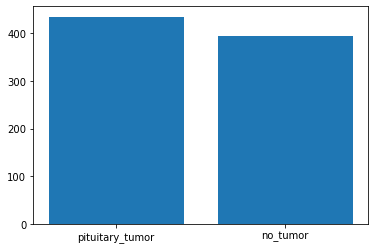

In [25]:
plt.bar(train_data['lables'].value_counts().index,train_data['lables'].value_counts().values)
plt.show()

In [28]:
train_pituitary_file_name=glob.glob('C:/Users/bismark/Desktop/brain_tumor/Training/pituitary_tumor/*.jpg')
train_no_file_name=glob.glob('C:/Users/bismark/Desktop/brain_tumor/Training/no_tumor/*.jpg')
  

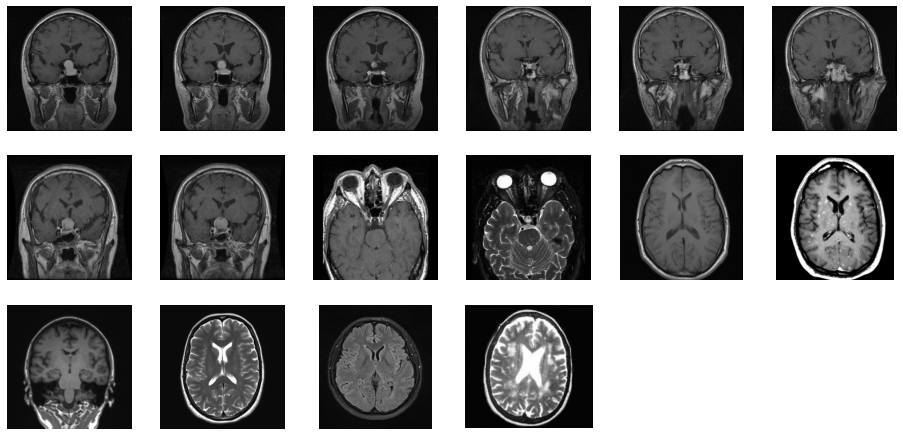

In [34]:
pituitary_img_paths = [os.path.join(train_pituitary_dir, file_name) for file_name in train_pituitary_file_name[:8]]
no_img_paths = [os.path.join(train_no_dir, file_name) for file_name in train_no_file_name[:8]]
fig = plt.figure(figsize=(16, 8))
fig.set_size_inches(16, 16)


for i, img_path in enumerate(pituitary_img_paths + no_img_paths):
    ax = plt.subplot(6, 6, i + 1)
    ax.axis('Off')

    img = mimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [48]:
train_datagen=ImageDataGenerator(rescale=1.0/255.0,horizontal_flip=True,vertical_flip=False,height_shift_range=0.1,width_shift_range=0.1,rotation_range=20,shear_range=0.1,zoom_range=0.1)
test_datagen=ImageDataGenerator(rescale=1.0/255.0)
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode='binary',target_size=(224,224))
test_generator=test_datagen.flow_from_directory(test_dir,batch_size=20,class_mode='binary',target_size=(224,224))

Found 830 images belonging to 2 classes.
Found 170 images belonging to 2 classes.


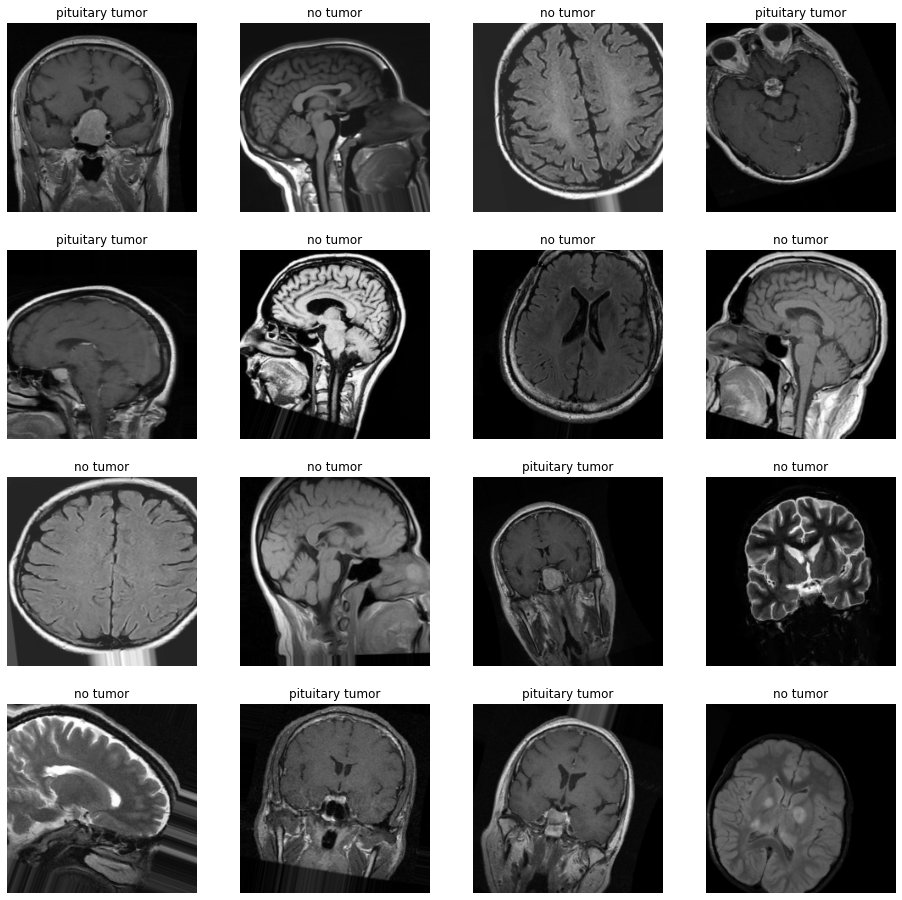

In [51]:
images,labels=next(train_generator)
fig,axes=plt.subplots(4,4,figsize=(16,8))
fig.set_size_inches(16,16)
for (images,lable,ax) in zip(images,labels,axes.flatten()):
    ax.imshow(images)
    if lable==1:
        ax.set_title('pituitary tumor')
    else:
        ax.set_title('no tumor')
    ax.axis('off')


In [58]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64,(3,3), activation='relu', input_shape=(224, 224, 3), padding = 'same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(32,(3,3), activation='relu', padding = 'same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(32,(3,3), activation='relu', padding = 'same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(16,(3,3), activation='relu', padding = 'same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(32,activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(32,activation='relu'))
cnn_model.add(Dense(1,activation='sigmoid'))
              

In [59]:
cnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)       

In [60]:
testX, testY = validation_generator.next()

In [61]:
model_history = cnn_model.fit(train_generator, 
                              validation_data=(testX, testY),
                              epochs=10)

Epoch 1/10
42/42 [==============================] - 47s 1s/step - loss: 0.6423 - accuracy: 0.6313 - val_loss: 0.6825 - val_accuracy: 0.6000
Epoch 2/10
42/42 [==============================] - 38s 900ms/step - loss: 0.4334 - accuracy: 0.8217 - val_loss: 0.7926 - val_accuracy: 0.6000
Epoch 3/10
42/42 [==============================] - 41s 971ms/step - loss: 0.3347 - accuracy: 0.8687 - val_loss: 1.3566 - val_accuracy: 0.6000
Epoch 4/10
42/42 [==============================] - 40s 952ms/step - loss: 0.3161 - accuracy: 0.8711 - val_loss: 2.3237 - val_accuracy: 0.6000
Epoch 5/10
42/42 [==============================] - 41s 986ms/step - loss: 0.3003 - accuracy: 0.8759 - val_loss: 0.8649 - val_accuracy: 0.6000
Epoch 6/10
42/42 [==============================] - 43s 1s/step - loss: 0.1684 - accuracy: 0.9422 - val_loss: 0.7623 - val_accuracy: 0.6000
Epoch 7/10
42/42 [==============================] - 44s 1s/step - loss: 0.1629 - accuracy: 0.9410 - val_loss: 0.7235 - val_accuracy: 0.6000
Epoch 8/

In [62]:
cnn_model.evaluate(validation_generator)

9/9 [==============================] - 1s 156ms/step - loss: 0.5699 - accuracy: 0.7471


[0.5698957443237305, 0.7470588088035583]

In [63]:
model = VGG16(weights='imagenet')
model.summary()

553467904/553467096 [==============================] - 169s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

In [65]:
transfer_layer = model.get_layer('block5_pool')
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)

In [66]:
vgg_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [68]:
for layer in vgg_model.layers:
    layer.trainable = False

In [69]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [72]:
new_model = Sequential()
new_model.add(vgg_model)
new_model.add(Flatten())
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(1, activation='sigmoid'))

In [73]:
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                802848    
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 15,518,625
Trainable params: 803,937
Non-trainable params: 14,714,688
_________________________________________________________________


In [74]:
new_model_history = new_model.fit(train_generator, 
                                  validation_data=(testX, testY),
                                  epochs=5)

Epoch 1/5
42/42 [==============================] - 58s 1s/step - loss: 0.3603 - accuracy: 0.8482 - val_loss: 0.5492 - val_accuracy: 0.7500
Epoch 2/5
42/42 [==============================] - 63s 1s/step - loss: 0.0947 - accuracy: 0.9651 - val_loss: 0.4632 - val_accuracy: 0.7500
Epoch 3/5
42/42 [==============================] - 62s 1s/step - loss: 0.0987 - accuracy: 0.9639 - val_loss: 0.3703 - val_accuracy: 0.7500
Epoch 4/5
42/42 [==============================] - 64s 2s/step - loss: 0.0704 - accuracy: 0.9759 - val_loss: 0.3418 - val_accuracy: 0.7500
Epoch 5/5
42/42 [==============================] - 62s 1s/step - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.5714 - val_accuracy: 0.8000


In [75]:
new_model.evaluate(validation_generator)

9/9 [==============================] - 11s 1s/step - loss: 0.3945 - accuracy: 0.8706


[0.394519180059433, 0.8705882430076599]

In [77]:
def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

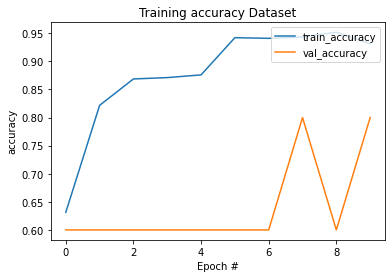

In [78]:
plot_history(model_history)

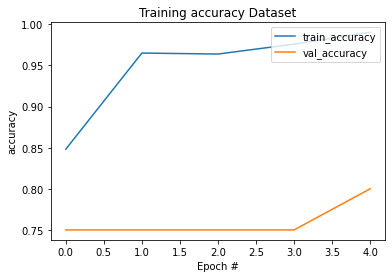

In [79]:
plot_history(new_model_history)